In [13]:
from helpers import *
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
stores = pd.read_csv("data/store.csv")
train = pd.read_csv("data/train.csv")
train.head()

C:\Users\MyLAP\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0
1,2013-01-01,379.0,2.0,0.0,0.0,0.0,0.0,a,1.0
2,2013-01-01,378.0,2.0,0.0,0.0,0.0,0.0,a,1.0
3,2013-01-01,377.0,2.0,0.0,0.0,0.0,0.0,a,1.0
4,2013-01-01,376.0,2.0,0.0,0.0,0.0,0.0,a,1.0


In [5]:
train = date_convert(train)

In [51]:
#merge stores into train
full_train = pd.merge(train, stores, how="left", on="Store")
full_train[full_train.Open>0].head(100)

,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Quarter,Month,Week,Day,...,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
27,820.0,1.0,0.0,a,1.0,2013,1,1,1,1,...,3139.0,b,b,900.0,NaN,NaN,1.0,14.0,2013.0,"Feb,May,Aug,Nov"
115,482.0,1.0,0.0,a,1.0,2013,1,1,1,1,...,2401.0,b,a,90.0,NaN,NaN,1.0,31.0,2013.0,"Jan,Apr,Jul,Oct"
147,625.0,1.0,0.0,a,1.0,2013,1,1,1,1,...,2646.0,b,b,590.0,NaN,NaN,1.0,5.0,2013.0,"Mar,Jun,Sept,Dec"
162,527.0,1.0,0.0,a,1.0,2013,1,1,1,1,...,3113.0,b,a,1260.0,6.0,2011.0,0.0,NaN,NaN,NaN
199,532.0,1.0,0.0,a,1.0,2013,1,1,1,1,...,2907.0,a,c,18160.0,NaN,NaN,0.0,NaN,NaN,NaN
231,1751.0,1.0,0.0,a,1.0,2013,1,1,1,1,...,9643.0,b,a,1270.0,5.0,2014.0,0.0,NaN,NaN,NaN
310,619.0,1.0,NaN,a,1.0,2013,1,1,1,1,...,4220.0,b,a,1870.0,10.0,2011.0,0.0,NaN,NaN,NaN
455,729.0,1.0,0.0,a,1.0,2013,1,1,1,1,...,3102.0,b,b,3640.0,NaN,NaN,1.0,10.0,2013.0,"Jan,Apr,Jul,Oct"
467,2875.0,1.0,0.0,a,1.0,2013,1,1,1,1,...,17267.0,b,a,1180.0,5.0,2013.0,0.0,NaN,NaN,NaN
470,1444.0,1.0,0.0,a,1.0,2013,1,1,1,1,...,6851.0,b,b,210.0,NaN,NaN,0.0,NaN,NaN,NaN


# Exploring the relationships between customers and sales

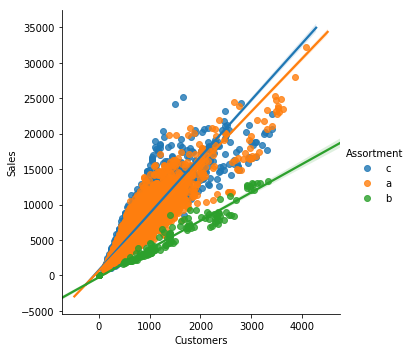

In [7]:
sns.lmplot(x="Customers", y="Sales", hue="Assortment", data=full_train.iloc[:20000,])

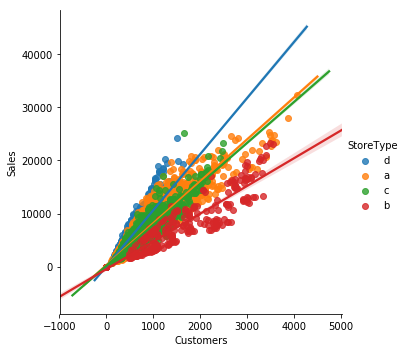

In [9]:
sns.lmplot(x="Customers", y="Sales", hue="StoreType", data=full_train.iloc[:20000,])

In [11]:
full_train['store_info'] = full_train['Assortment'] + full_train['StoreType']
full_train[['store_info','Assortment','StoreType']].head(10)

,store_info,Assortment,StoreType
0,cd,c,d
1,ad,a,d
2,ca,c,a
3,ca,c,a
4,aa,a,a
5,ca,c,a
6,aa,a,a
7,cd,c,d
8,cd,c,d
9,cd,c,d


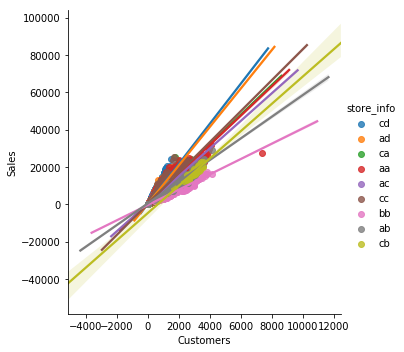

In [12]:
sns.lmplot(x="Customers", y="Sales", hue="store_info", data=full_train.iloc[:50000,])

In [ ]:
sns.lmplot(x="Customers", y="Sales", hue="store_info", data=full_train.iloc[:50000,])

## Fit OLS to get slope of relationship CustomersxSales for each store type

In [22]:
mod = smf.ols(formula='Sales ~ Customers + store_info -1', data=full_train)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                 4.368e+05
Date:                Thu, 10 Oct 2019   Prob (F-statistic):               0.00
Time:                        12:56:35   Log-Likelihood:            -5.0292e+06
No. Observations:              582064   AIC:                         1.006e+07
Df Residuals:                  582054   BIC:                         1.006e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
store_info[aa]   181.4959      4.059     44.

In [23]:
mini = full_train[['Sales', 'Customers', 'store_info']]

In [44]:
customer_weight = res.params[9]

storetype_weights = res.params[0:9]
storetype_weights.index = ['aa','ab', 'ac', 'ad', 'bb', 'ca', 'cb', 'cc', 'cd']
print(storetype_weights)

aa     181.495914
ab   -3788.439126
ac    -136.746265
ad    1286.165874
bb   -8161.248545
ca     342.472958
cb   -7740.735504
cc     363.075894
cd    1504.875670
dtype: float64


In [80]:
customer_weight

8.23535158518705

In [71]:
mini['expected_sales'] = np.nan
mini['weight'] = np.nan

In [66]:
a = storetype_weights.to_dict()
a

{'aa': 181.49591362569686,
 'ab': -3788.439126018291,
 'ac': -136.74626451021038,
 'ad': 1286.1658742668697,
 'bb': -8161.248544620941,
 'ca': 342.47295772136613,
 'cb': -7740.735503750843,
 'cc': 363.0758942641238,
 'cd': 1504.875669907448}

In [74]:
mini['weight'] = mini['store_info'].map(a)

In [78]:
mini.expected_sales[mini.Sales > 0] = (mini.Customers[mini.Sales > 0] * customer_weight) + mini.weight[mini.Sales > 0]

In [79]:
mini[mini.Sales > 0].head(20)

,Sales,Customers,store_info,expected_sales,weight
27,3139.0,820.0,bb,-1408.260245,-8161.248545
115,2401.0,482.0,ab,181.000338,-3788.439126
147,2646.0,625.0,bb,-3014.153804,-8161.248545
162,3113.0,527.0,ab,551.591159,-3788.439126
199,2907.0,532.0,ca,4723.680001,342.472958
231,9643.0,1751.0,ab,10631.661500,-3788.439126
310,4220.0,619.0,ab,1309.243505,-3788.439126
455,3102.0,729.0,bb,-2157.677239,-8161.248545
467,17267.0,2875.0,ab,19888.196681,-3788.439126
470,6851.0,1444.0,bb,3730.599144,-8161.248545


In [82]:
mini['Sales'].mean()

5668.015833612122

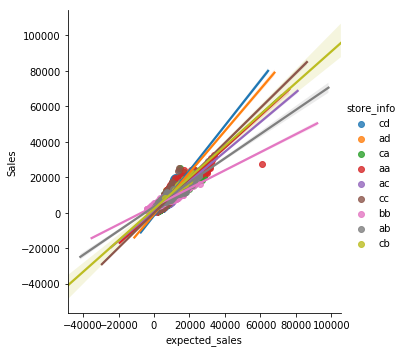

In [81]:
sns.lmplot(x="expected_sales", y="Sales", hue="store_info", data=mini.iloc[:50000,])

In [93]:
RMSE = np.sqrt(np.sum((mini.loc[mini.Sales > 0, 'Sales'] -  mini.loc[mini.Sales > 0, 'expected_sales'])**2)/len(mini.loc[mini.Sales > 0]))
RMSE

1405.5531514976046

In [102]:
# calculate mean sales per number of customers per each store type
mean_sales = mini.loc[mini.Sales > 0, ['Sales', 'Customers', 'expected_sales', 'store_info']].groupby('store_info').mean()
mean_sales

,Sales,Customers,expected_sales
store_info,,,
aa,6495.474098,762.004491,6456.870810
ab,11096.817780,1830.493852,11286.321319
ac,6771.673678,842.378391,6800.535956
ad,6357.804359,582.895783,6086.517589
bb,8114.868619,1992.886046,8250.868713
ca,7424.357222,851.726764,7356.742311
cb,17916.451197,3114.252372,17906.227704
cc,6858.811168,780.007170,6786.709177
cd,6841.525687,609.543926,6524.684210


In [103]:
mean_sales['rel'] = mean_sales['Sales']/mean_sales['Customers']

In [104]:
mean_sales['rel'] 

store_info
aa     8.524194
ab     6.062199
ac     8.038755
ad    10.907275
bb     4.071918
ca     8.716830
cb     5.753051
cc     8.793267
cd    11.224008
Name: rel, dtype: float64

### impute these values back into the training set

In [105]:
b = mean_sales['rel'].to_dict()
b

{'aa': 8.524193980181652,
 'ab': 6.0621988808524065,
 'ac': 8.038755205055068,
 'ad': 10.907274576139915,
 'bb': 4.0719180283725995,
 'ca': 8.716829784095863,
 'cb': 5.753050510170323,
 'cc': 8.793266822474015,
 'cd': 11.22400764294939}

In [115]:
mini['rel'] = mini['store_info'].map(b)
mini.head(30)

,Sales,Customers,store_info,expected_sales,weight,rel,expected_sales2
0,0.0,0.0,cd,NaN,1504.875670,11.224008,0.000000
1,0.0,0.0,ad,NaN,1286.165874,10.907275,0.000000
2,0.0,0.0,ca,NaN,342.472958,8.716830,0.000000
3,0.0,0.0,ca,NaN,342.472958,8.716830,0.000000
4,0.0,0.0,aa,NaN,181.495914,8.524194,0.000000
5,0.0,0.0,ca,NaN,342.472958,8.716830,0.000000
6,0.0,0.0,aa,NaN,181.495914,8.524194,0.000000
7,0.0,0.0,cd,NaN,1504.875670,11.224008,0.000000
8,0.0,0.0,cd,NaN,1504.875670,11.224008,0.000000
9,0.0,0.0,cd,NaN,1504.875670,11.224008,0.000000


In [114]:
mini['expected_sales2'] = np.nan
mini['expected_sales2'] = mini['Customers'] * mini['rel']

In [116]:
RMSE = np.sqrt(np.sum((mini.loc[mini.Sales > 0, 'Sales'] -  mini.loc[mini.Sales > 0, 'expected_sales2'])**2)/len(mini.loc[mini.Sales > 0]))
RMSE

1331.9013845710228

# Holidays

In [123]:
full_train.iloc[:20, 10:]

,Date,Store,DayOfWeek,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013-01-01,1115.0,2.0,0.0,d,c,5350.0,NaN,NaN,1.0,22.0,2012.0,"Mar,Jun,Sept,Dec"
1,2013-01-01,379.0,2.0,0.0,d,a,6630.0,NaN,NaN,0.0,NaN,NaN,NaN
2,2013-01-01,378.0,2.0,0.0,a,c,2140.0,8.0,2012.0,0.0,NaN,NaN,NaN
3,2013-01-01,377.0,2.0,0.0,a,c,100.0,6.0,2010.0,1.0,18.0,2010.0,"Feb,May,Aug,Nov"
4,2013-01-01,376.0,2.0,0.0,a,a,160.0,8.0,2012.0,0.0,NaN,NaN,NaN
5,2013-01-01,375.0,2.0,0.0,a,c,15710.0,2.0,2013.0,1.0,37.0,2009.0,"Jan,Apr,Jul,Oct"
6,2013-01-01,374.0,2.0,0.0,a,a,1150.0,9.0,2007.0,0.0,NaN,NaN,NaN
7,2013-01-01,373.0,2.0,0.0,d,c,11120.0,NaN,NaN,1.0,22.0,2012.0,"Jan,Apr,Jul,Oct"
8,2013-01-01,372.0,2.0,0.0,d,c,4880.0,8.0,2010.0,1.0,18.0,2014.0,"Jan,Apr,Jul,Oct"
9,2013-01-01,371.0,2.0,0.0,d,c,1970.0,7.0,2009.0,1.0,45.0,2014.0,"Feb,May,Aug,Nov"


In [145]:
full_train.columns

Index(['Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year',
       'Quarter', 'Month', 'Week', 'Day', 'Date', 'Store', 'DayOfWeek',
       'Sales', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'near_xmas'],
      dtype='object')

In [155]:
full_train['near_xmas'] = np.where(((full_train['Month'] == 12) & ((full_train['Day'] >15) & (full_train['Day'] <= 31))), 1, 0)

In [158]:
full_train['near_xmas'].sum()

17840